Import lib

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy

In [4]:
df=pd.read_excel("cust_data.xlsx")

In [5]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# Preprocessing of data

In [6]:
df.Gender.replace(to_replace = dict(M = 1, F = 0), inplace = True)

In [7]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [8]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [9]:
df1=df

In [10]:
df1

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1.0,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df1.iloc[:,1:]

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1.0,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df["Orders"].unique()

array([ 7,  0, 10,  4,  6,  9,  1,  8,  5,  3,  2, 11, 12])

In [13]:
df1.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [21]:
df1 = df1.dropna()

In [22]:
df1.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

# Passing the required columns for the x variable

In [23]:
X = df1[["Gender","Orders"]]

In [24]:
X.head()

,Gender,Orders
0,1.0,7
1,0.0,0
2,1.0,7
3,0.0,0
5,0.0,4


# Model Building

In [29]:
wcss=[]
for i in range(1,12):
    km=KMeans(n_clusters=i,init="k-means++")
    km.fit(X)
    wcss.append(km.inertia_)

In [30]:
wcss

[353950.7147309021,
 82009.99776628232,
 38008.77255549622,
 22871.415796893016,
 15877.249190888222,
 12923.21366981955,
 10070.655963671754,
 8338.463665957883,
 7297.305030055886,
 6331.272676664514,
 5350.780070524107]

<function matplotlib.pyplot.show(*args, **kw)>

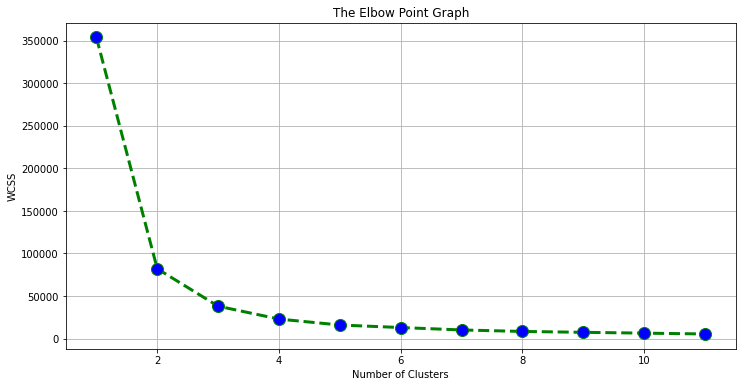

In [31]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,12),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [72]:

kmeans= KMeans(n_clusters = 2, init = 'k-means++') #initialize the class object
kmeans.fit_predict(X) #returns a cluster number for each of the data points
#print(label)

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [66]:
df1["labels"] = label

<ipython-input-66-b8f36b8d2591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["labels"] = label


In [67]:
df1.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,labels
0,1,1.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0.0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,1.0,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0.0,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [68]:

print(kmeans.cluster_centers_)

[[0.18813051 0.62982823]
 [0.19173867 8.75405373]
 [0.19580777 4.45858896]]


In [42]:
#filter rows of original data
filtered_label0 = df1[label == 0]
 
filtered_label1 = df1[label == 1]

In [43]:
filtered_label0

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,labels
1,2,0.0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0.0,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8,9,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


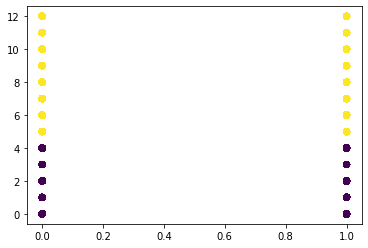

In [73]:
plt.scatter(df1['Gender'],df1['Orders'],c=kmeans.labels_)
plt.show()